In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

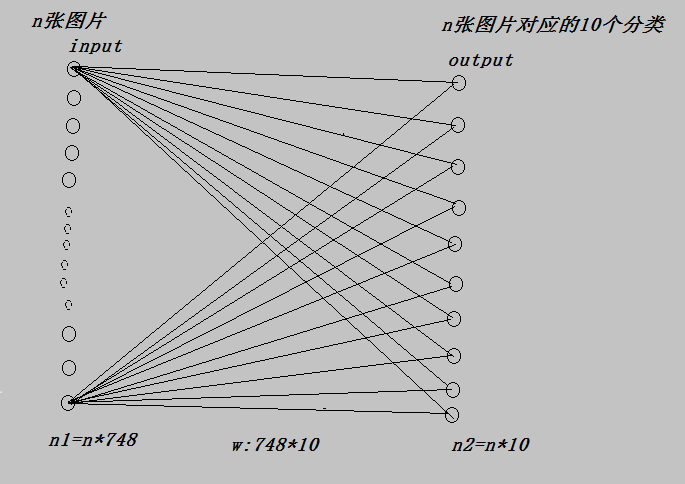

In [23]:
from IPython.display import Image
Image('mnist图像分类.png')

#### 1.加载数据


In [3]:
#one_hot指一个长度为n的数组，只有一个元素是1.0，其余元素是0.0，例如n为4，标记2对应的one_hot编码为0.0,0.0,1.0,0.0
#使用one_hot编码的直接原因是我们使用0~9个类别的多分类输出层是softmax，它的输出是一个概率分布，从而要求输入也要以概率分布的形式出现，
#进而求交叉熵
mnist = input_data.read_data_sets('./MNIST_data',one_hot=True)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


#### 2.构建回归模型

In [4]:
x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
#y为目标值
y = tf.matmul(x,W) + b

#### 3.梯度下降以0.5的学习率最小化目标函数的交叉熵

In [16]:
#定义损失函数和优化器,y_位目标值
y_ = tf.placeholder(tf.float32,[None,10])
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = y_))
#交叉熵计算有问题，尝试计算MSE均方差
mse = tf.reduce_mean(tf.reduce_sum(tf.square(y - y_),reduction_indices=[1]))
#采用SGD作为优化器,学习率为0.5;设置优化器优化的目标
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

#### 4.训练模型

In [17]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

#### 5.Stochastic training 随机训练。使用SGD进行梯度下降，每次从训练数据中随机抓取一小部分数据进行梯度下降训练。

In [19]:
# Train
for _ in range(1000):
    #每次随机抽取100个样本用于SGD训练
    batch_xs,batch_ys = mnist.train.next_batch(1000)
    session.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

#### 6.评估模型

In [22]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuarcy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#在测试集上的准确率
print(session.run(accuarcy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.8645
